# 1. Load Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## ksqdj

In [2802]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2803]:
# encofing type latin1
encodings = ['latin1']
for encoding in encodings:
    try:
        df1 = pd.read_csv('/content/drive/MyDrive/data_mining/Catalogue.csv', encoding=encoding)

        print(f"Successfully read the file with encoding: {encoding}")
        break
    except UnicodeDecodeError:
        print(f"Failed to read the file with encoding: {encoding}")

Successfully read the file with encoding: latin1


In [2804]:
catalogue = pd.read_csv('/content/drive/MyDrive/data_mining/Catalogue.csv', encoding=encoding)

In [2805]:
immatriculations  = pd.read_csv('/content/drive/MyDrive/data_mining/Immatriculations_small.csv', encoding=encoding)

In [2806]:
marketing  = pd.read_csv('/content/drive/MyDrive/data_mining/Marketing.csv', encoding=encoding)

In [2807]:
clients = pd.read_csv('/content/drive/MyDrive/data_mining/Clients.csv', encoding=encoding)

In [2808]:
clients.shape

(100000, 7)

In [2809]:
immatriculations.shape

(99989, 10)

### visualate data

In [2810]:
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,très longue,5,5,blanc,False,50500
1,Volvo,S80 T6,272,très longue,5,5,noir,False,50500
2,Volvo,S80 T6,272,très longue,5,5,rouge,False,50500
3,Volvo,S80 T6,272,très longue,5,5,gris,True,35350
4,Volvo,S80 T6,272,très longue,5,5,bleu,True,35350


In [2811]:
clients.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25,F,159,En Couple,2,false,3467 SB 72
1,53,M,594,En Couple,2,false,113 LY 42
2,20,F,949,En Couple,1,false,925 WK 87
3,29,M,571,En Couple,2,false,3279 RV 81
4,47,M,502,En Couple,1,false,82 RZ 54


In [2812]:
immatriculations.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3467 SB 72,Seat,Toledo 1.6,102,longue,5,5,bleu,False,18880
1,113 LY 42,Renault,Vel Satis 3.5 V6,245,trÃ¨s longue,5,5,noir,False,49200
2,925 WK 87,Jaguar,X-Type 2.5 V6,197,longue,5,5,blanc,False,37100
3,3279 RV 81,Renault,Laguna 2.0T,170,longue,5,5,gris,False,27300
4,82 RZ 54,Fiat,Croma 2.2,147,longue,5,5,bleu,False,24780


In [2813]:
marketing.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False


# 2. Cleaning Datasets

### check basic info


In [2814]:
print(catalogue.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   marque     270 non-null    object
 1   nom        270 non-null    object
 2   puissance  270 non-null    int64 
 3   longueur   270 non-null    object
 4   nbPlaces   270 non-null    int64 
 5   nbPortes   270 non-null    int64 
 6   couleur    270 non-null    object
 7   occasion   270 non-null    bool  
 8   prix       270 non-null    int64 
dtypes: bool(1), int64(4), object(4)
memory usage: 17.3+ KB
None


In [2815]:
print(clients.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   age                 100000 non-null  object
 1   sexe                100000 non-null  object
 2   taux                100000 non-null  object
 3   situationFamiliale  100000 non-null  object
 4   nbEnfantsAcharge    100000 non-null  object
 5   2eme voiture        100000 non-null  object
 6   immatriculation     100000 non-null  object
dtypes: object(7)
memory usage: 5.3+ MB
None


In [2816]:
print(immatriculations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99989 entries, 0 to 99988
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   immatriculation  99989 non-null  object
 1   marque           99989 non-null  object
 2   nom              99989 non-null  object
 3   puissance        99989 non-null  int64 
 4   longueur         99989 non-null  object
 5   nbPlaces         99989 non-null  int64 
 6   nbPortes         99989 non-null  int64 
 7   couleur          99989 non-null  object
 8   occasion         99989 non-null  bool  
 9   prix             99989 non-null  int64 
dtypes: bool(1), int64(4), object(5)
memory usage: 7.0+ MB
None


In [2817]:
print(marketing.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 20 non-null     int64 
 1   sexe                20 non-null     object
 2   taux                20 non-null     int64 
 3   situationFamiliale  20 non-null     object
 4   nbEnfantsAcharge    20 non-null     int64 
 5   2eme voiture        20 non-null     bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 948.0+ bytes
None


### Clients dataset cleaning

#### Handle the age column

In [2818]:
from sklearn.impute import KNNImputer

In [2819]:
# Replace '?' with NaN and then fill NaN with the mean age
clients['age'] = pd.to_numeric(clients['age'], errors='coerce')
# clients['age'].fillna(clients['age'].mean(), inplace=True)
# clients.dropna(subset=['age'], inplace=True)

clients['age'] = clients['age'].replace(-1, None, regex=True  )
clients.dropna(subset=['age'], inplace=True)

In [2820]:
clients['age'].unique()

array([25.0, 53.0, 20.0, 29.0, 47.0, 52.0, 58.0, 21.0, 42.0, 66.0, 54.0,
       41.0, 63.0, 46.0, 43.0, 23.0, 49.0, 65.0, 24.0, 64.0, 45.0, 40.0,
       28.0, 18.0, 32.0, 34.0, 36.0, 55.0, 79.0, 33.0, 39.0, 48.0, 71.0,
       51.0, 57.0, 37.0, 81.0, 75.0, 62.0, 19.0, 30.0, 67.0, 26.0, 22.0,
       80.0, 83.0, 82.0, 38.0, 35.0, 72.0, 70.0, 27.0, 77.0, 59.0, 60.0,
       31.0, 73.0, 76.0, 61.0, 44.0, 68.0, 69.0, 50.0, 78.0, 56.0, 74.0,
       84.0], dtype=object)

In [2821]:

# # Step 2: Select numerical columns for KNN Imputation
# numerical_features = ['age', 'taux', 'nbEnfantsAcharge']
# imputer = KNNImputer(n_neighbors=3)

# # Step 3: Apply KNN Imputer
# clients[numerical_features] = imputer.fit_transform(clients[numerical_features])

# # Step 4: Convert imputed age back to integers
# clients['age'] = clients['age'].round(0).astype(int)

In [2822]:
# Ensure all ages are within the range [18, 84]
# clients['age'] = clients['age'].apply(lambda x: max(18, min(84, x)))


In [2823]:
clients.shape

(99697, 7)

#### handle the taux column

In [2824]:
# Replace '?' with NaN and then fill NaN with the mean taux
clients['taux'] = pd.to_numeric(clients['taux'], errors='coerce')
clients['taux'] = clients['taux'].replace(-1, None, regex=True  )
# clients['taux'].fillna(clients['taux'].mean(), inplace=True)
clients.dropna(subset=['taux'], inplace=True)

In [2825]:
clients['taux'].unique()

array([159.0, 594.0, 949.0, 571.0, 502.0, 503.0, 211.0, 536.0, 176.0,
       428.0, 185.0, 562.0, 555.0, 967.0, 152.0, 189.0, 1034.0, 167.0,
       1119.0, 587.0, 229.0, 456.0, 1389.0, 924.0, 1336.0, 222.0, 493.0,
       1391.0, 721.0, 442.0, 241.0, 188.0, 864.0, 1147.0, 564.0, 497.0,
       465.0, 1187.0, 206.0, 595.0, 582.0, 1322.0, 753.0, 1317.0, 486.0,
       1348.0, 166.0, 1072.0, 545.0, 178.0, 1153.0, 738.0, 566.0, 554.0,
       455.0, 726.0, 205.0, 160.0, 243.0, 1324.0, 527.0, 1007.0, 867.0,
       400.0, 557.0, 161.0, 591.0, 1252.0, 467.0, 546.0, 516.0, 1144.0,
       811.0, 223.0, 530.0, 598.0, 538.0, 585.0, 739.0, 772.0, 549.0,
       599.0, 156.0, 998.0, 402.0, 436.0, 228.0, 553.0, 596.0, 418.0,
       221.0, 597.0, 430.0, 218.0, 207.0, 879.0, 197.0, 470.0, 1345.0,
       713.0, 438.0, 812.0, 719.0, 449.0, 435.0, 1096.0, 592.0, 1074.0,
       459.0, 480.0, 489.0, 164.0, 1062.0, 495.0, 747.0, 532.0, 475.0,
       803.0, 248.0, 407.0, 552.0, 226.0, 1117.0, 817.0, 823.0, 1201.0

In [2826]:
clients.dropna(subset=["taux"], inplace=True)


In [2827]:
len(clients['taux'].unique())

1000

In [2828]:
# Ensure all taux are within the range [18, 84]
# clients['taux'] = clients['taux'].apply(lambda x: max(544, min(74185, x)))

In [2829]:
clients.shape

(99403, 7)

#### handle the sexe column

In [2830]:
# Standardize the 'sexe' column
sexe_mapping = {
    'M': 'M', 'F': 'F', 'Femme': 'F', 'Homme': 'M',
    'Féminin': 'F', 'Masculin': 'M', 'N/D': None, '?': None, ' ': None
}

In [2831]:
clients['sexe'] = clients['sexe'].replace(sexe_mapping)

In [2832]:
# Drop rows with None values in the 'sexe' column
clients.dropna(subset=['sexe'], inplace=True)
clients['sexe'] = clients['sexe'].replace('F', False)
clients['sexe'] = clients['sexe'].replace('M', True)



In [2833]:
clients['sexe'].unique()

array([False,  True])

In [2834]:
# Count the occurrences of each class in the 'sexe' column
sexe_counts = clients['sexe'].value_counts()

# Display the counts
print(sexe_counts)

sexe
True     69305
False    29809
Name: count, dtype: int64


#### Handle the 2eme voiture Column

In [2835]:
# Standardize the '2eme voiture' column
clients['2eme voiture'] = clients['2eme voiture'].replace('?', False)
clients['2eme voiture'] = clients['2eme voiture'].replace(' ', False)
clients['2eme voiture'] = clients['2eme voiture'].replace('false', False)

clients['2eme voiture'] = clients['2eme voiture'].replace('true', True)


# Drop rows with None values in the '2eme voiture' column
# clients.dropna(subset=['2eme voiture'])

In [2836]:
clients['2eme voiture'].unique()

array([False,  True])

In [2837]:
clients.shape

(99114, 7)

In [2838]:
# Count the occurrences of each class in the 'sexe' column
sexe_counts = clients['2eme voiture'].value_counts()

# Display the counts
print(sexe_counts)

2eme voiture
False    86290
True     12824
Name: count, dtype: int64


#### handle the situationFamiliale column

In [2839]:
# Standardize the 'situationFamiliale' column
situation_mapping = {
    'En Couple': 'En Couple', 'Célibataire': 'Célibataire', 'Seul': 'Célibataire',
    'Divorcée': 'Célibataire', 'Seule': 'Célibataire', 'Marié(e)': 'En Couple', 'N/D': 'Célibataire', '?': 'Célibataire', ' ': 'Célibataire'
}
clients['situationFamiliale'] = clients['situationFamiliale'].replace(situation_mapping)

# Drop rows with None values in the 'situationFamiliale' column
# clients.dropna(subset=['situationFamiliale'], inplace=True)

In [2840]:
clients['situationFamiliale'].unique()

array(['En Couple', 'Célibataire'], dtype=object)

In [2841]:
clients['situationFamiliale'] = clients['situationFamiliale'].replace('En Couple', True)
clients['situationFamiliale'] = clients['situationFamiliale'].replace('Célibataire', False)




In [2842]:
clients['situationFamiliale'].value_counts()

,count
situationFamiliale,
True,63938
False,35176


In [2843]:
clients.shape

(99114, 7)

#### Handle Duplicate immatriculation Values

In [2844]:
# Remove duplicate rows based on the 'immatriculation' column
clients.drop_duplicates(subset=['immatriculation'], inplace=True)

In [2845]:
clients.shape

(99103, 7)

#### handle the nbEnfantsAcharge column

In [2846]:
# Replace '-1', '?', and empty values with 0
clients['nbEnfantsAcharge'] = pd.to_numeric(clients['nbEnfantsAcharge'], errors='coerce')
clients['nbEnfantsAcharge'] = clients['nbEnfantsAcharge'].replace(-1, None, regex=True  )

clients.dropna(subset=['nbEnfantsAcharge'], inplace=True)



In [2847]:
# # Ensure all values are within the range [0, 4]
# clients['nbEnfantsAcharge'] = clients['nbEnfantsAcharge'].apply(lambda x: max(0, min(4, x)))

In [2848]:
clients['nbEnfantsAcharge'].unique()

array([2.0, 1.0, 3.0, 4.0, 0.0], dtype=object)

In [2849]:
clients.shape

(98798, 7)

#### verify the cleaning

In [2850]:
# Check for any remaining issues
print(clients['sexe'].unique())
print(clients['2eme voiture'].unique())
print(clients['situationFamiliale'].unique())
print(clients['nbEnfantsAcharge'].unique())
print(clients['age'].unique())
print(clients['immatriculation'].unique())
print(clients.shape)

[False  True]
[False  True]
[ True False]
[2.0 1.0 3.0 4.0 0.0]
[25.0 53.0 20.0 29.0 47.0 52.0 58.0 21.0 42.0 66.0 54.0 41.0 46.0 43.0
 23.0 49.0 65.0 24.0 64.0 45.0 40.0 28.0 18.0 32.0 34.0 36.0 55.0 79.0
 33.0 39.0 48.0 71.0 51.0 57.0 37.0 81.0 75.0 62.0 19.0 30.0 67.0 26.0
 22.0 80.0 83.0 82.0 63.0 38.0 35.0 72.0 70.0 27.0 77.0 59.0 60.0 31.0
 73.0 76.0 61.0 44.0 68.0 69.0 50.0 78.0 56.0 74.0 84.0]
['3467 SB 72' '113 LY 42' '925 WK 87' ... '5803 LS 45' '3783 DX 64'
 '4656 EJ 74']
(98798, 7)


In [2851]:
clients.dtypes

,0
age,object
sexe,bool
taux,object
situationFamiliale,bool
nbEnfantsAcharge,object
2eme voiture,bool
immatriculation,object


### immatriculations dataset cleaning

#### handle the longueur column

In [2852]:
# Correct the encoding issue in the 'longueur' column
immatriculations['longueur'] = immatriculations['longueur'].replace('trÃ¨s longue', 'tres longue')

In [2853]:
# Check for any remaining issues
print(immatriculations['longueur'].unique())
print(immatriculations['nbPlaces'].unique())
print(immatriculations['nbPortes'].unique())
print(immatriculations['couleur'].unique())
print(immatriculations['puissance'].unique())
print(immatriculations['occasion'].unique())
print(immatriculations['prix'].unique())

print(immatriculations.shape)

['longue' 'tres longue' 'moyenne' 'courte']
[5]
[5 3]
['bleu' 'noir' 'blanc' 'gris' 'rouge']
[102 245 197 170 147 507 272 135  75 200 306  65  55 125 115 150  90  58
 136 110 109 193]
[False  True]
[ 18880  49200  37100  27300  24780  66360  35350  22350  34440  17346
  13750  30000  50500 101300  18310   8990  94800   8540  70910  23900
  12200  18200  16029   7500   8850   9450  38600  18130  25060  25970
  22900  19110  28500  27020  12817   9625  26630  12740  15644  25900
  16450  18650  31790  16730  18641  13500  19950]
(99989, 10)


#### handlethe occasion column

In [2854]:
immatriculations.dtypes

,0
immatriculation,object
marque,object
nom,object
puissance,int64
longueur,object
nbPlaces,int64
nbPortes,int64
couleur,object
occasion,bool
prix,int64


### catalogue dataset cleaning

In [2855]:
# Correct the encoding issue in the 'longueur' column
catalogue['longueur'] = catalogue['longueur'].replace('très longue', 'tres longue')

In [2856]:
# catalogue.drop(columns=['nbPlaces'], inplace=True)


In [2857]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["courte", "moyenne", "longue", "tres longue"]])

# Apply the OrdinalEncoder on 'longueur' for both datasets
catalogue["longueur"] = ordinal_encoder.fit_transform(catalogue[["longueur"]])
immatriculations["longueur"] = ordinal_encoder.transform(immatriculations[["longueur"]])

### verifying the cleaning

In [2858]:
catalogue.head()

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,Volvo,S80 T6,272,3.0,5,5,blanc,False,50500
1,Volvo,S80 T6,272,3.0,5,5,noir,False,50500
2,Volvo,S80 T6,272,3.0,5,5,rouge,False,50500
3,Volvo,S80 T6,272,3.0,5,5,gris,True,35350
4,Volvo,S80 T6,272,3.0,5,5,bleu,True,35350


In [2859]:
clients.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation
0,25.0,False,159.0,True,2.0,False,3467 SB 72
1,53.0,True,594.0,True,2.0,False,113 LY 42
2,20.0,False,949.0,True,1.0,False,925 WK 87
3,29.0,True,571.0,True,2.0,False,3279 RV 81
4,47.0,True,502.0,True,1.0,False,82 RZ 54


In [2860]:
immatriculations.head(30)

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix
0,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880
1,113 LY 42,Renault,Vel Satis 3.5 V6,245,3.0,5,5,noir,False,49200
2,925 WK 87,Jaguar,X-Type 2.5 V6,197,2.0,5,5,blanc,False,37100
3,3279 RV 81,Renault,Laguna 2.0T,170,2.0,5,5,gris,False,27300
4,82 RZ 54,Fiat,Croma 2.2,147,2.0,5,5,bleu,False,24780
5,8290 SD 41,BMW,M5,507,3.0,5,5,bleu,True,66360
6,9339 BW 87,Volvo,S80 T6,272,3.0,5,5,bleu,True,35350
7,3696 JS 92,Renault,Megane 2.0 16V,135,1.0,5,5,noir,False,22350
8,6484 MS 45,Renault,Vel Satis 3.5 V6,245,3.0,5,5,bleu,True,34440
9,9896 TW 50,Fiat,Croma 2.2,147,2.0,5,5,gris,True,17346


here I noticed that is the same price in the old cars withe the same name

In [2861]:
marketing.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False


In [2862]:
# Divide the dataset into occasion True and False
occasion_true = immatriculations[immatriculations['occasion'] == True]
occasion_false = immatriculations[immatriculations['occasion'] == False]

# Get the first occurrence of each 'nom' and sort by 'prix' in descending order for occasion True
occasion_true_first = occasion_true.drop_duplicates(subset=['nom'], keep='first').sort_values(by='prix', ascending=False)

# Get the first occurrence of each 'nom' and sort by 'prix' in descending order for occasion False
occasion_false_first = occasion_false.drop_duplicates(subset=['nom'], keep='first').sort_values(by='prix', ascending=False)

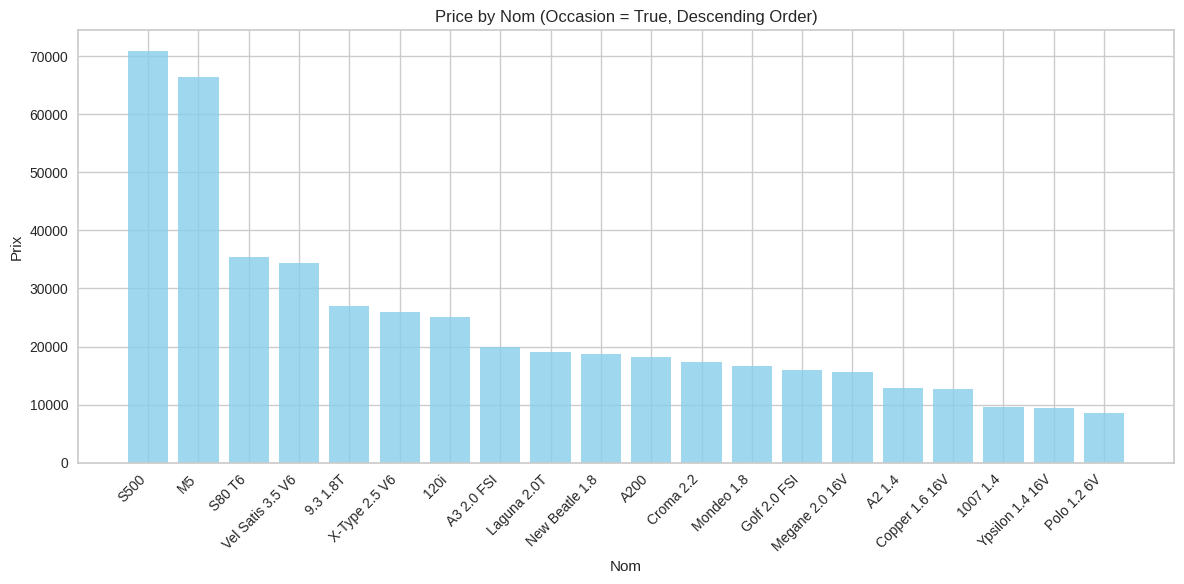

In [2863]:

# Plot for occasion True
plt.figure(figsize=(12, 6))
plt.bar(occasion_true_first['nom'], occasion_true_first['prix'], color='skyblue', alpha=0.8)
plt.title("Price by Nom (Occasion = True, Descending Order)")
plt.xlabel("Nom")
plt.ylabel("Prix")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


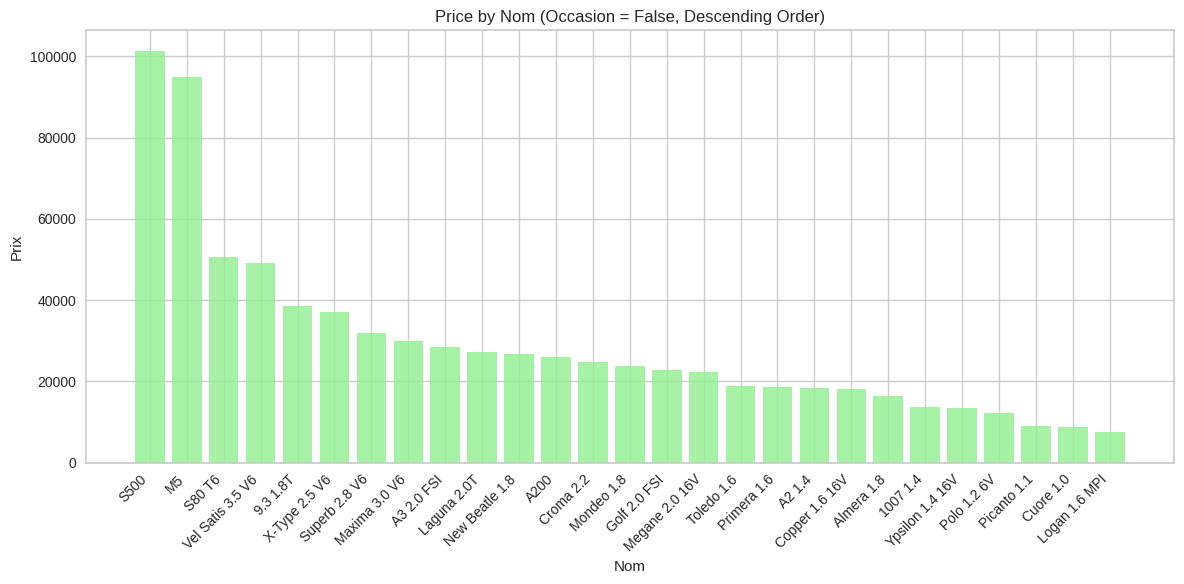

In [2864]:
# Plot for occasion False
plt.figure(figsize=(12, 6))
plt.bar(occasion_false_first['nom'], occasion_false_first['prix'], color='lightgreen', alpha=0.8)
plt.title("Price by Nom (Occasion = False, Descending Order)")
plt.xlabel("Nom")
plt.ylabel("Prix")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# 3. Identification des catégories de véhicules :

## catalogue clustring

#### categorical and numerical features

In [2865]:
from sklearn.preprocessing import  LabelEncoder

In [2866]:
# catalog_clastring = catalogue.copy()

### the change start here so i notice the i had to divise dataset into newcars and old cars

In [2867]:
# Example: Splitting catalogue into occasion (used) and new cars
old_cars = catalogue[catalogue['occasion'] == True]
new_cars = catalogue[catalogue['occasion'] == False]


In [2868]:
new_catalog_clastring = new_cars.copy()
old_catalog_clastring = old_cars.copy()


In [2869]:
# new_catalog_clastring = new_cars.drop_duplicates(subset=['nom'])
# old_catalog_clastring = old_cars.drop_duplicates(subset=['nom'])
# new_cars = new_cars.drop_duplicates(subset=['nom'])
# old_cars = old_cars.drop_duplicates(subset=['nom'])


In [2870]:
new_catalog_clastring.drop(columns=[ 'occasion','couleur','marque','nbPlaces'], inplace=True)

# old cars
old_catalog_clastring.drop(columns=[ 'occasion','couleur','marque', 'nbPlaces'], inplace=True)

In [2871]:
new_catalog_clastring.shape

(160, 5)

In [2872]:
# new_catalog_clastring =new_catalog_clastring.drop_duplicates()

In [2873]:
new_catalog_clastring.head()

,nom,puissance,longueur,nbPortes,prix
0,S80 T6,272,3.0,5,50500
1,S80 T6,272,3.0,5,50500
2,S80 T6,272,3.0,5,50500
5,S80 T6,272,3.0,5,50500
6,S80 T6,272,3.0,5,50500


In [2874]:
old_catalog_clastring.shape

(110, 5)

In [2875]:
# Select categorical and numerical features
categorical_features = [ 'nom']
numerical_features = ['puissance', 'nbPortes', 'prix']


In [2876]:
# Initialize a LabelEncoder for category
label_encoders = {}
# Encode each column
for col in categorical_features:
    label_encoders[col] = LabelEncoder()
    old_catalog_clastring[col] = label_encoders[col].fit_transform(old_catalog_clastring[col])
    new_catalog_clastring[col] = label_encoders[col].fit_transform(new_catalog_clastring[col])



#### elbow using yellowbrick

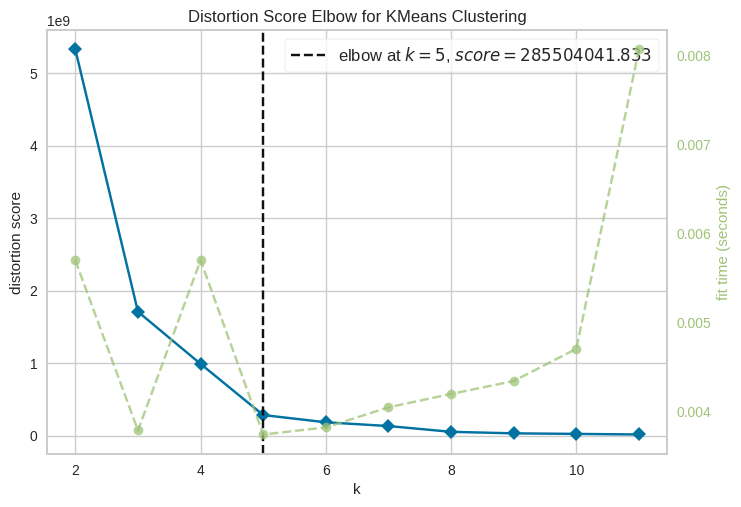

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2877]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import KElbowVisualizer

# Use Yellowbrick's KElbowVisualizer for optimal cluster determination
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 12))
# Fit and display the visualizer
visualizer.fit(old_catalog_clastring)
visualizer.show()

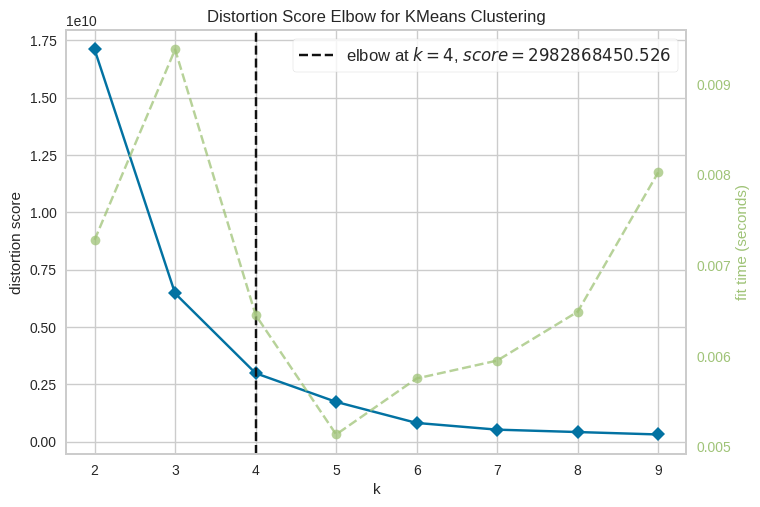

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [2878]:

# Use Yellowbrick's KElbowVisualizer for optimal cluster determination
model = KMeans(random_state=42)
visualizerc = KElbowVisualizer(model, k=(2, 10))

# Fit and display the visualizer
visualizerc.fit(new_catalog_clastring)
visualizerc.show()

In [2879]:
from sklearn.metrics import silhouette_score

for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(new_catalog_clastring)
    silhouette_avg = silhouette_score(new_catalog_clastring, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")


For n_clusters = 2, the silhouette score is 0.836
For n_clusters = 3, the silhouette score is 0.578
For n_clusters = 4, the silhouette score is 0.629
For n_clusters = 5, the silhouette score is 0.590
For n_clusters = 6, the silhouette score is 0.657
For n_clusters = 7, the silhouette score is 0.668
For n_clusters = 8, the silhouette score is 0.683
For n_clusters = 9, the silhouette score is 0.687


In [2880]:
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(old_catalog_clastring)
    silhouette_avg = silhouette_score(old_catalog_clastring, cluster_labels)
    print(f"For n_clusters = {n_clusters}, the silhouette score is {silhouette_avg:.3f}")

For n_clusters = 2, the silhouette score is 0.837
For n_clusters = 3, the silhouette score is 0.680
For n_clusters = 4, the silhouette score is 0.623
For n_clusters = 5, the silhouette score is 0.755
For n_clusters = 6, the silhouette score is 0.709
For n_clusters = 7, the silhouette score is 0.716
For n_clusters = 8, the silhouette score is 0.789
For n_clusters = 9, the silhouette score is 0.793


### TSNE

In [2881]:
new_catalog_clastring.head()

,nom,puissance,longueur,nbPortes,prix
0,25,272,3.0,5,50500
1,25,272,3.0,5,50500
2,25,272,3.0,5,50500
5,25,272,3.0,5,50500
6,25,272,3.0,5,50500


In [2882]:
from sklearn.manifold import TSNE

# TSNE for visualization in 2D
tsne = TSNE(n_components=2, random_state=42,learning_rate='auto', init='random', perplexity=2)
tsne_results = tsne.fit_transform(new_catalog_clastring)

In [2883]:
# TSNE for visualization in 2D
tsnee = TSNE(n_components=2, random_state=42,learning_rate='auto', init='random', perplexity=3)
tsne_resultss = tsnee.fit_transform(old_catalog_clastring)


In [2884]:
  # Perform KMeans clustering with the optimal number of clusters (4)
optimal_clusters = 8
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
new_catalog_clastring['cluster'] = kmeans.fit_predict(new_catalog_clastring)

# Save the clustered dataset for further use
# clustered_catalogue_path = "/content/drive/MyDrive/data_mining/Catalogue_clustered.csv"
# catalog_clastring.to_csv(clustered_catalogue_path, index=False)

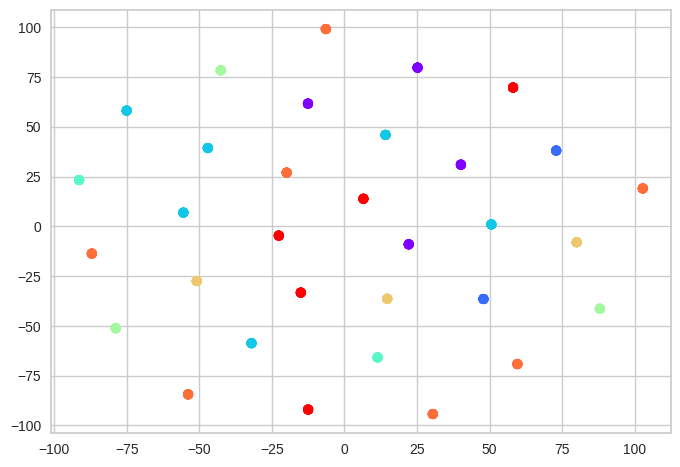

In [2885]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=kmeans.labels_, cmap="rainbow")

In [2886]:
# Perform KMeans clustering with the optimal number of clusters (4)
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
old_catalog_clastring['cluster'] = kmeans.fit_predict(old_catalog_clastring)


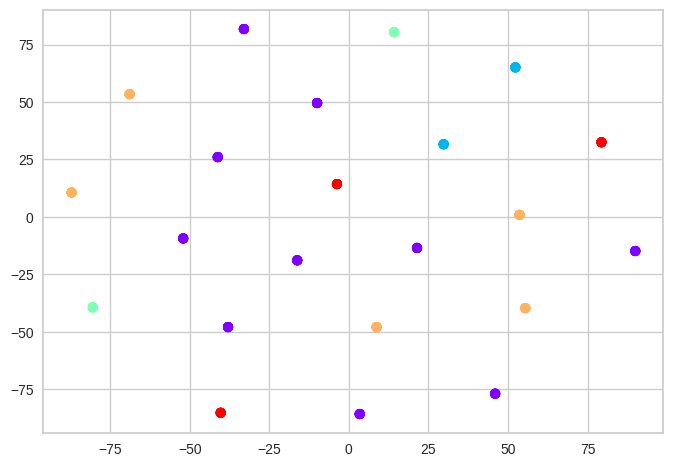

In [2887]:
plt.scatter(tsne_resultss[:,0], tsne_resultss[:,1], c=kmeans.labels_, cmap="rainbow")

In [2888]:
# new_catalog_clastring = new_catalog_clastring.drop_duplicates(subset=['puissance', 'nbPortes', 'prix'], keep='first')

new_catalog_clastring

,nom,puissance,longueur,nbPortes,prix,cluster
0,25,272,3.0,5,50500,3
1,25,272,3.0,5,50500,3
2,25,272,3.0,5,50500,3
5,25,272,3.0,5,50500,3
6,25,272,3.0,5,50500,3
...,...,...,...,...,...,...
261,3,75,0.0,5,18310,6
262,3,75,0.0,5,18310,6
265,3,75,0.0,5,18310,6
266,3,75,0.0,5,18310,6


In [2889]:
new_catalog_clastring.shape


(160, 6)

In [2890]:
old_catalog_clastring.head()

,nom,puissance,longueur,nbPortes,prix,cluster
3,17,272,3.0,5,35350,2
4,17,272,3.0,5,35350,2
7,17,272,3.0,5,35350,2
8,17,272,3.0,5,35350,2
9,17,272,3.0,5,35350,2


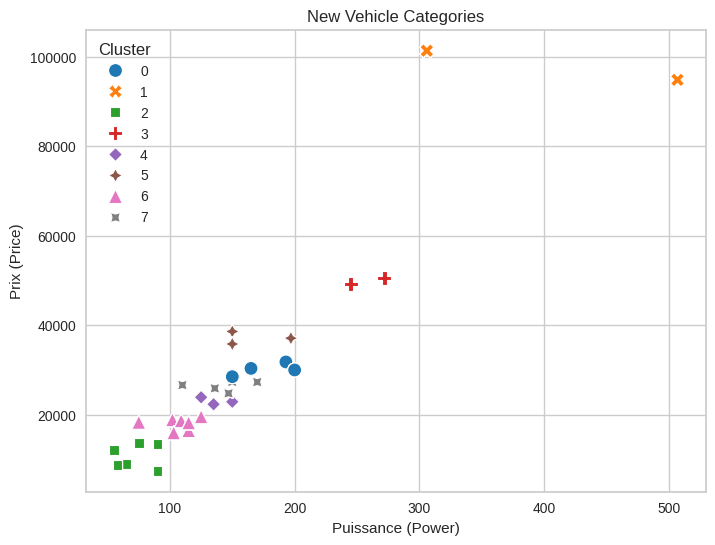

In [2891]:
import matplotlib.cm as cm

# Visualize the clusters using the first two numerical features, labeled by category name
plt.figure(figsize=(8, 6))

# Create a scatterplot with seaborn
sns.scatterplot(
    data=new_catalog_clastring,
    x='puissance',
    y='prix',
    hue='cluster',  # Color points by cluster
    palette='tab10',  # Use a distinct color palette
    style='cluster',  # Optional: Different markers for each cluster
    s=100  # Adjust marker size
)

plt.title("New Vehicle Categories")
plt.xlabel("Puissance (Power)")
plt.ylabel("Prix (Price)")
plt.legend(title="Cluster")
plt.show()

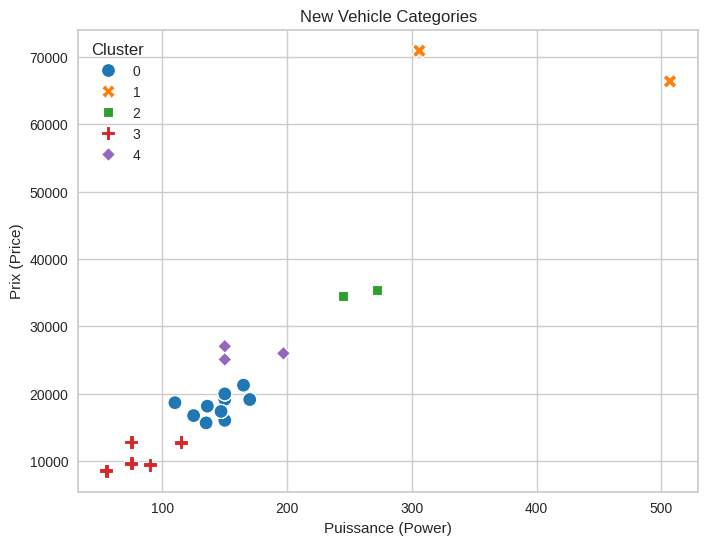

In [2892]:
# Visualize the clusters using the first two numerical features, labeled by category name
plt.figure(figsize=(8, 6))

# Create a scatterplot with seaborn
sns.scatterplot(
    data=old_catalog_clastring,
    x='puissance',
    y='prix',
    hue='cluster',  # Color points by cluster
    palette='tab10',  # Use a distinct color palette
    style='cluster',  # Optional: Different markers for each cluster
    s=100  # Adjust marker size
)

plt.title("New Vehicle Categories")
plt.xlabel("Puissance (Power)")
plt.ylabel("Prix (Price)")
plt.legend(title="Cluster")
plt.show()

In [2893]:
new_catalog_clastring.shape

(160, 6)

In [2894]:
# import matplotlib.cm as cm

# # Visualize the clusters using the first two numerical features, labeled by category name
# colormap = cm.get_cmap('tab10', optimal_clusters)  # Use a colormap with enough distinct colors

# plt.figure(figsize=(8, 6))
# for category in new_catalog_clastring['cluster'].unique():
#     category_data = new_catalog_clastring[new_catalog_clastring['cluster'] == category]
#     plt.scatter(category_data['nom'], category_data['prix'], label=f"{category}", color=colormap(category / optimal_clusters))

# plt.title("Vehicle Categories")
# plt.xlabel("Nom (Name)")
# plt.ylabel("Prix (Price)")
# plt.legend()
# plt.show()

In [2895]:
# Define category names for each cluster
new_category_mapping = {
    2: "Mini",
    6: "Economy",
    4: "Small Compact",
    7: "Large Compact",
    0: "standard",
    5: "Luxury v1.0",
    3: "Luxury",
    1:"Sports Car",

}

# Map the cluster numbers to category names
new_cars['category'] = new_catalog_clastring['cluster'].map(new_category_mapping)

old_category_mapping = {
    3: "Economy",
    0: "Compact",
    # 0: "standard",
    4: "Luxury v1.0",
    2: "Luxury",
    1: "Sports Car",

}
old_cars['category'] = old_catalog_clastring['cluster'].map(old_category_mapping)
# catalog_clastring['category'] = catalog_clastring['cluster'].map(category_mapping)


In [2896]:
# Display a summary of clusters
cluster_summary = new_cars.groupby('category').size()
cluster_summary

,0
category,
Economy,35
Large Compact,25
Luxury,10
Luxury v1.0,15
Mini,30
Small Compact,15
Sports Car,10
standard,20


In [2897]:
# Display a summary of clusters
cluster_summary = new_catalog_clastring.groupby('cluster').size()
cluster_summary

,0
cluster,
0,20
1,10
2,30
3,10
4,15
5,15
6,35
7,25


In [2898]:
new_cars

,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,category
0,Volvo,S80 T6,272,3.0,5,5,blanc,False,50500,Luxury
1,Volvo,S80 T6,272,3.0,5,5,noir,False,50500,Luxury
2,Volvo,S80 T6,272,3.0,5,5,rouge,False,50500,Luxury
5,Volvo,S80 T6,272,3.0,5,5,gris,False,50500,Luxury
6,Volvo,S80 T6,272,3.0,5,5,bleu,False,50500,Luxury
...,...,...,...,...,...,...,...,...,...,...
261,Audi,A2 1.4,75,0.0,5,5,bleu,False,18310,Economy
262,Audi,A2 1.4,75,0.0,5,5,gris,False,18310,Economy
265,Audi,A2 1.4,75,0.0,5,5,noir,False,18310,Economy
266,Audi,A2 1.4,75,0.0,5,5,rouge,False,18310,Economy


In [2899]:
new_cars.to_excel("Catalogue_8Clusters.xlsx")

In [2900]:
old_cars.to_excel("Old_Catalogue_5Clusters.xlsx")

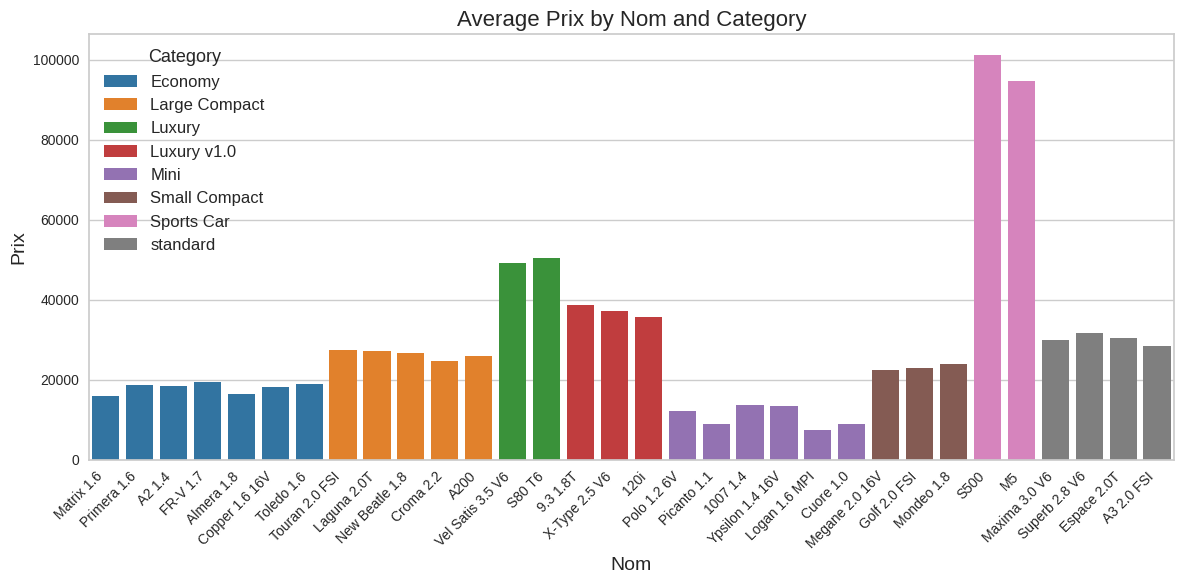

In [2901]:

# Group by 'nom' and 'category' to calculate the average price
grouped = new_cars.groupby(['nom', 'category'])['prix'].mean().reset_index()
grouped = grouped.sort_values(by='category')

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=grouped,
    x='nom',
    y='prix',
    hue='category',  # Color bars by category
    palette='tab10'  # Use a distinct color palette
)

# Customize the plot
plt.title("Average Prix by Nom and Category", fontsize=16)
plt.xlabel("Nom", fontsize=14)
plt.ylabel("Prix", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=10)
plt.legend(title="Category", fontsize=12, title_fontsize=13)
plt.tight_layout()

# Show the plot
plt.show()

#### old cars

In [2902]:
new_cars['nom'].unique()

array(['S80 T6', 'Touran 2.0 FSI', 'Polo 1.2 6V', 'New Beatle 1.8',
       'Golf 2.0 FSI', 'Superb 2.8 V6', 'Toledo 1.6', '9.3 1.8T',
       'Vel Satis 3.5 V6', 'Megane 2.0 16V', 'Laguna 2.0T', 'Espace 2.0T',
       '1007 1.4', 'Primera 1.6', 'Maxima 3.0 V6', 'Almera 1.8',
       'Copper 1.6 16V', 'S500', 'A200', 'Ypsilon 1.4 16V', 'Picanto 1.1',
       'X-Type 2.5 V6', 'Matrix 1.6', 'FR-V 1.7', 'Mondeo 1.8',
       'Croma 2.2', 'Cuore 1.0', 'Logan 1.6 MPI', 'M5', '120i',
       'A3 2.0 FSI', 'A2 1.4'], dtype=object)

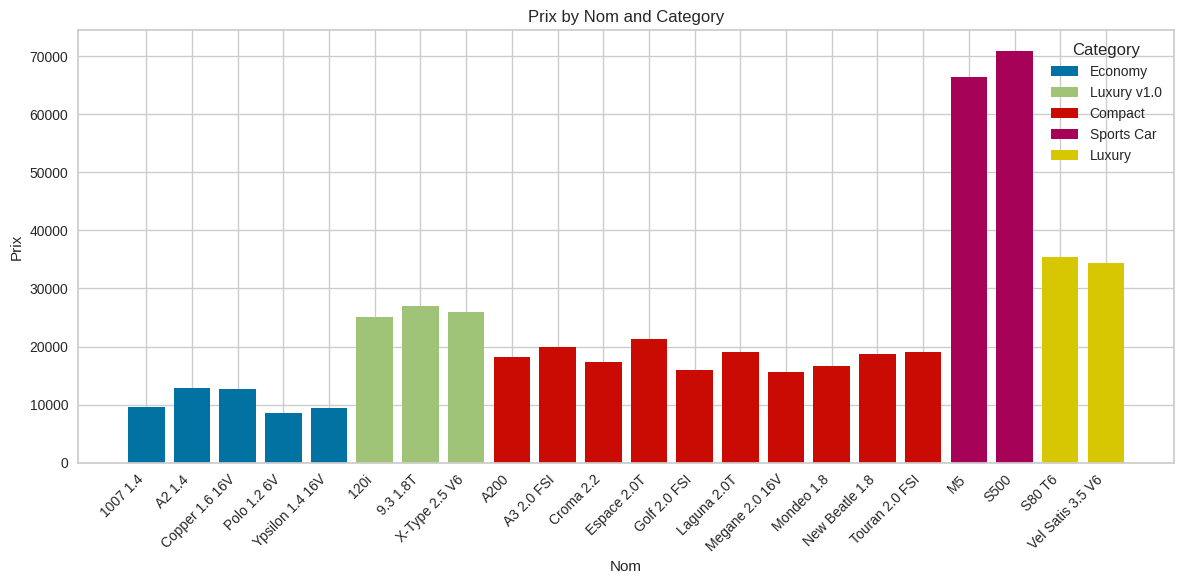

In [2903]:
# Group by 'nom' and 'category' to calculate the average price
grouped = old_cars.groupby(['nom', 'category'])['prix'].mean().reset_index()

# Create a bar plot
plt.figure(figsize=(12, 6))
categories = grouped['category'].unique()
for category in categories:
    category_data = grouped[grouped['category'] == category]
    plt.bar(
        category_data['nom'],
        category_data['prix'],
        label=category
    )

# Customize the plot
plt.title("Prix by Nom and Category")
plt.xlabel("Nom")
plt.ylabel("Prix")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Category")
plt.tight_layout()

# Show the plot
plt.show()

In [2904]:
old_cars['nom'].unique()

array(['S80 T6', 'Touran 2.0 FSI', 'Polo 1.2 6V', 'New Beatle 1.8',
       'Golf 2.0 FSI', '9.3 1.8T', 'Vel Satis 3.5 V6', 'Megane 2.0 16V',
       'Laguna 2.0T', 'Espace 2.0T', '1007 1.4', 'Copper 1.6 16V', 'S500',
       'A200', 'Ypsilon 1.4 16V', 'X-Type 2.5 V6', 'Mondeo 1.8',
       'Croma 2.2', 'M5', '120i', 'A3 2.0 FSI', 'A2 1.4'], dtype=object)

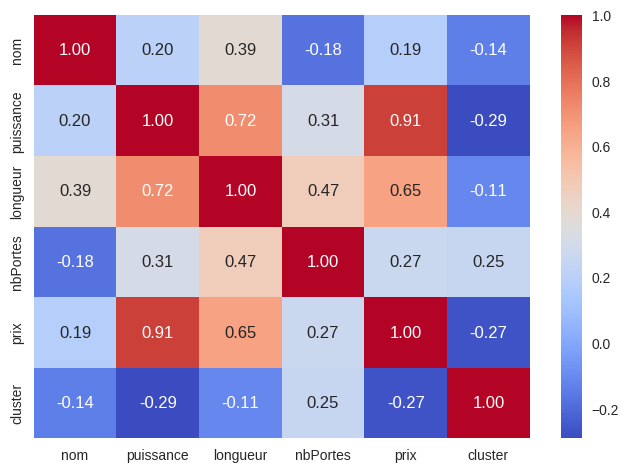

In [2905]:
# Correlation heatmap
correlation_matrix = new_catalog_clastring.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

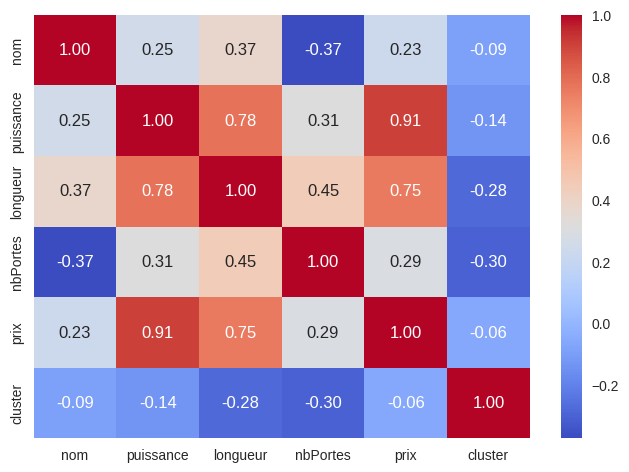

In [2906]:
# Correlation heatmap
correlation_matrix = old_catalog_clastring.corr()
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f")
plt.show()

# 4. Apply Categories to the Immatriculations Dataset

### merge the category with immatriculations

In [2907]:
old_immatriculations = immatriculations[immatriculations['occasion'] == True]
new_immatriculations = immatriculations[immatriculations['occasion'] == False]

In [2908]:
old_immatriculationss = old_immatriculations.copy()
new_immatriculationss = new_immatriculations.copy()

In [2909]:
# Merge the Immatriculations dataset with the Catalogue dataset to assign categories
immatriculations_with_new_categories = new_immatriculationss.merge(
    new_cars[['nom', 'marque', 'longueur', 'puissance', 'prix','nbPortes', 'nbPlaces','category']],
    on=['nom', 'marque', 'longueur', 'puissance', 'prix','nbPortes', 'nbPlaces'],
    how='left'
)

In [2910]:
immatriculations_with_new_categories.head()

,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,category
0,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880,Economy
1,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880,Economy
2,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880,Economy
3,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880,Economy
4,3467 SB 72,Seat,Toledo 1.6,102,2.0,5,5,bleu,False,18880,Economy


In [2911]:
immatriculations_with_new_categories.shape

(343190, 11)

In [2912]:
immatriculations_with_new_categories['category'].unique()

array(['Economy', 'Luxury', 'Luxury v1.0', 'Large Compact',
       'Small Compact', 'Mini', 'standard', 'Sports Car'], dtype=object)

In [2913]:
# Check for any unmatched records where categories could not be assigned
unmatched_records = immatriculations_with_new_categories['category'].isnull().sum()

In [2914]:
immatriculations_with_new_categories = immatriculations_with_new_categories.drop_duplicates(subset=['immatriculation'], keep='first')


In [2915]:
# Summary of the merge process
merge_summary = {
    "total_records": len(immatriculations_with_new_categories),
    "unmatched_records": unmatched_records,
    # "updated_dataset_path": immatriculations_with_categories_path
}

merge_summary

{'total_records': 68638, 'unmatched_records': 0}

### clustering for imma_cata

In [2916]:
# Merge the Clients dataset with the Immatriculations dataset (which now includes categories)
clients_with_vehicles = clients.merge(
    immatriculations_with_new_categories,
    on='immatriculation',
    how='left'
)


In [2917]:
clients_with_vehicles.dropna(subset=['category'], inplace=True)


In [2918]:

# Check for any unmatched records where vehicle data could not be assigned to clients
# unmatched_client_records = clients_with_vehicles['category'].isnull().sum()
# Drop duplicate rows
clients_with_vehicles = clients_with_vehicles.drop_duplicates(subset=['immatriculation'], keep='first')

# Verify the result
print(f"Original number of rows: {len(clients_with_vehicles)}")
print(f"Number of rows after removing duplicates: {len(clients_with_vehicles)}")

Original number of rows: 67819
Number of rows after removing duplicates: 67819


In [2919]:
# Remove duplicate rows based on the 'immatriculation' column
clients_with_vehicles = clients_with_vehicles.drop_duplicates(subset=['immatriculation'], keep='first')

# # Verify the result
duplicates_after = clients_with_vehicles.duplicated(subset=['immatriculation']).sum()
print(f"Duplicates remaining in 'immatriculation': {duplicates_after}")

Duplicates remaining in 'immatriculation': 0


In [2920]:
# Summary of the merge process
merge_summary = {
    "total_records": len(clients_with_vehicles),
    "unmatched_records": unmatched_records,
    # "updated_dataset_path": immatriculations_with_categories_path
}

merge_summary

{'total_records': 67819, 'unmatched_records': 0}

In [2921]:
clients_with_vehicles['category'].unique()

array(['Economy', 'Luxury', 'Luxury v1.0', 'Large Compact',
       'Small Compact', 'Mini', 'standard', 'Sports Car'], dtype=object)

In [2922]:
clients_with_vehicles.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,immatriculation,marque,nom,puissance,longueur,nbPlaces,nbPortes,couleur,occasion,prix,category
0,25.0,False,159.0,True,2.0,False,3467 SB 72,Seat,Toledo 1.6,102.0,2.0,5.0,5.0,bleu,False,18880.0,Economy
1,53.0,True,594.0,True,2.0,False,113 LY 42,Renault,Vel Satis 3.5 V6,245.0,3.0,5.0,5.0,noir,False,49200.0,Luxury
2,20.0,False,949.0,True,1.0,False,925 WK 87,Jaguar,X-Type 2.5 V6,197.0,2.0,5.0,5.0,blanc,False,37100.0,Luxury v1.0
3,29.0,True,571.0,True,2.0,False,3279 RV 81,Renault,Laguna 2.0T,170.0,2.0,5.0,5.0,gris,False,27300.0,Large Compact
4,47.0,True,502.0,True,1.0,False,82 RZ 54,Fiat,Croma 2.2,147.0,2.0,5.0,5.0,bleu,False,24780.0,Large Compact


In [2923]:
clients_with_vehicles['nbPortes'].unique()

array([5., 3.])

In [2924]:
clients_with_vehicles.columns

Index(['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme voiture', 'immatriculation', 'marque', 'nom', 'puissance',
       'longueur', 'nbPlaces', 'nbPortes', 'couleur', 'occasion', 'prix',
       'category'],
      dtype='object')

In [2925]:
clients_with_vehicles_copy = clients_with_vehicles.copy()

In [2926]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder(categories=[["Mini", "Economy", "Small Compact", "Large Compact", "standard", "Luxury v1.0", "Luxury", "Sports Car"]])

# Apply the OrdinalEncoder on 'longueur' for both datasets
clients_with_vehicles_copy["category"] = ordinal_encoder.fit_transform(clients_with_vehicles_copy[["category"]])
# immatriculations["longueur"] = ordinal_encoder.transform(immatriculations[["longueur"]])

In [2927]:
# Select categorical and numerical features
categorical_columns = [
     "marque", "nom"
]
numerical_featuress = ['age','taux', 'puissance', 'nbPortes', 'prix''nbEnfantsAcharge']



In [2928]:
from sklearn.preprocessing import LabelEncoder

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in categorical_columns:
    label_encoders[col] = LabelEncoder()
    clients_with_vehicles_copy[col] = label_encoders[col].fit_transform(clients_with_vehicles_copy[col])

### Corr Matrix

In [2929]:
clients_with_vehicles_copy = clients_with_vehicles_copy.drop(columns=['immatriculation', 'nbPlaces', 'occasion', 'couleur'])

In [2930]:
clients_with_vehicles_copy.dropna(subset=["taux"], inplace=True)


In [2931]:
clients_with_vehicles_copy.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,marque,nom,puissance,longueur,nbPortes,prix,category
0,25.0,False,159.0,True,2.0,False,15,23,102.0,2.0,5.0,18880.0,1.0
1,53.0,True,594.0,True,2.0,False,13,24,245.0,3.0,5.0,49200.0,6.0
2,20.0,False,949.0,True,1.0,False,6,25,197.0,2.0,5.0,37100.0,5.0
3,29.0,True,571.0,True,2.0,False,13,10,170.0,2.0,5.0,27300.0,3.0
4,47.0,True,502.0,True,1.0,False,4,7,147.0,2.0,5.0,24780.0,3.0


In [2932]:
from sklearn.preprocessing import StandardScaler


In [2933]:
# Calculate the correlation matrix
correlation_matrix = clients_with_vehicles_copy.corr()

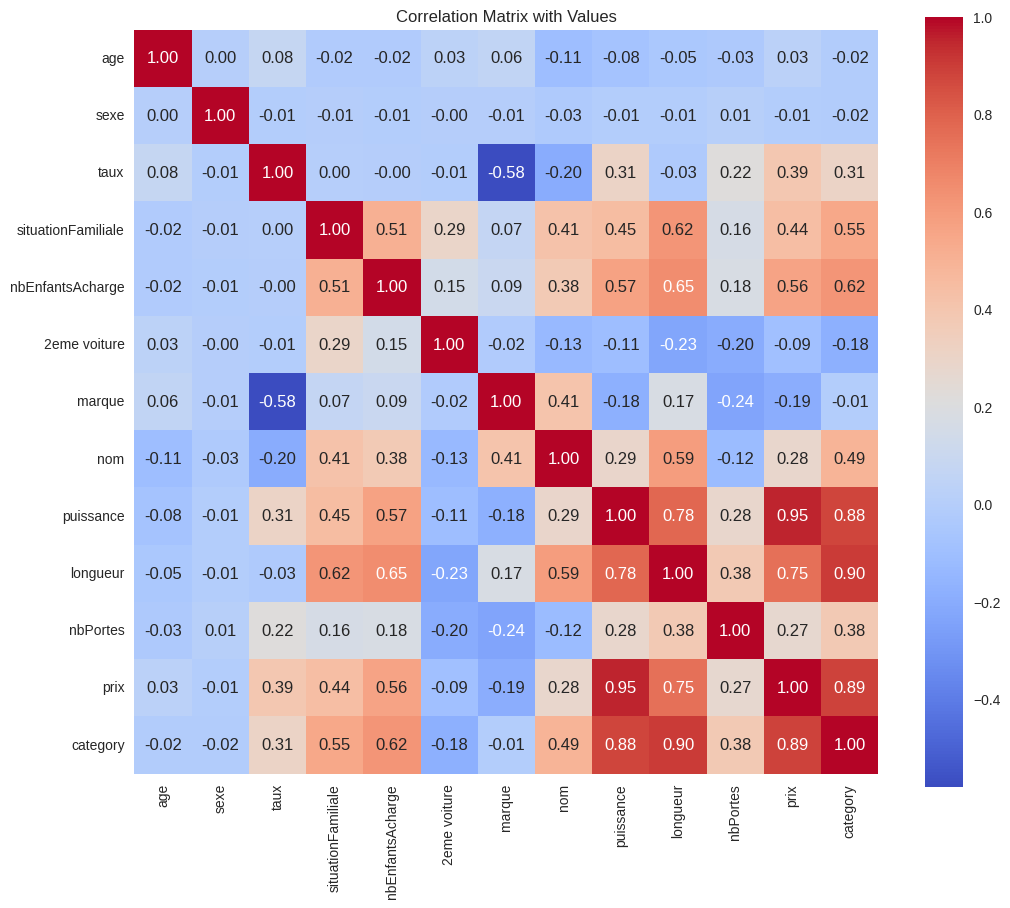

In [2934]:
# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix with Values")
plt.show()

### apply new clustering to see if there are changes in corelation matrix

In [2935]:
# Save the DataFrame to a CSV file
# clients_with_vehicles_copy.to_csv('clients_with_vehicles_copy.csv', index=False)

# Example with a specific path
clients_with_vehicles_copy.to_csv('/content/drive/MyDrive/data_mining/clients_with_vehicles_copy.csv', index=False)

# Verify the file was saved
print("DataFrame saved successfully.")

DataFrame saved successfully.


In [2936]:
data = clients_with_vehicles_copy.copy()

In [2937]:
data = data.drop(columns=['marque' ,'nom','nbPortes', 'puissance', 'longueur','prix'])

In [2938]:
data.columns

Index(['age', 'sexe', 'taux', 'situationFamiliale', 'nbEnfantsAcharge',
       '2eme voiture', 'category'],
      dtype='object')

In [2939]:
data.shape

(67819, 7)

In [2940]:
len(data['taux'].unique())

1000

In [2941]:
data

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,category
0,25.0,False,159.0,True,2.0,False,1.0
1,53.0,True,594.0,True,2.0,False,6.0
2,20.0,False,949.0,True,1.0,False,5.0
3,29.0,True,571.0,True,2.0,False,3.0
4,47.0,True,502.0,True,1.0,False,3.0
...,...,...,...,...,...,...,...
98793,40.0,True,211.0,False,0.0,False,0.0
98794,33.0,True,433.0,False,0.0,False,0.0
98795,21.0,True,599.0,True,2.0,False,3.0
98796,22.0,True,229.0,True,2.0,False,4.0


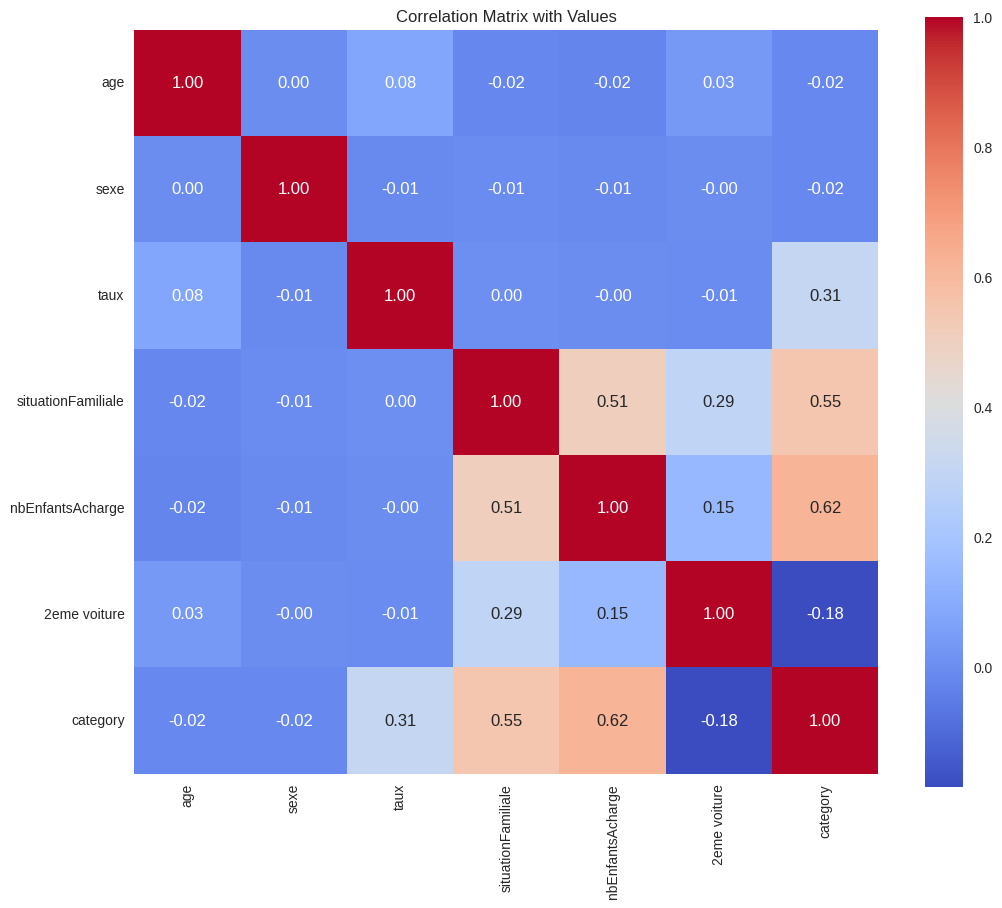

In [2942]:
# Calculate the correlation matrix
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, cbar=True)
plt.title("Correlation Matrix with Values")
plt.show()

# 5. Build and Train a Classification Model

## Prepar Data

In [2970]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


In [2971]:
# Shuffle the dataset before splitting
# data_shuffled = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [2982]:
# Define features (X) and target (y)
X = data.drop(columns=['category'])
y = data['category']

In [2983]:
X.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,25.0,False,159.0,True,2.0,False
1,53.0,True,594.0,True,2.0,False
2,20.0,False,949.0,True,1.0,False
3,29.0,True,571.0,True,2.0,False
4,47.0,True,502.0,True,1.0,False


In [2984]:
sum(X['taux'].isna())

0

In [2985]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

ros = RandomOverSampler(random_state=42)
X, y = ros.fit_resample(X, y)

# Imbalance Data
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X, y)

In [3076]:
X.shape


(108504, 6)

### Split The Data

In [2986]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### standarize the data

In [2987]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [3078]:
scaler = StandardScaler()
scaler.fit(X_train_scaled)
# Save the scaler to a file
joblib.dump(scaler, '/content/drive/MyDrive/data_mining/model6/8_cl_scaler.pkl')

['/content/drive/MyDrive/data_mining/model6/8_cl_scaler.pkl']

## Train Different Models

In [2988]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Train the Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train_scaled, y_train)



DecisionTreeClassifier(random_state=42)

In [2989]:
# Predict on the test set
y_pred_dt = decision_tree.predict(X_test_scaled)

# Evaluate the Decision Tree
print("Decision Tree Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

Decision Tree Results:
Confusion Matrix:
[[2295   81  387   12    1    2    3    1]
 [  98 2274    0   91  236    2    0    6]
 [ 319    0 2112  184    0    0   75    0]
 [   9   41  195 2347    1    0  209    1]
 [   1   39    0    0 2599    0    0    0]
 [   0    2    1    0    0 2335    0  364]
 [   1    4  157  265    0    2 2297    0]
 [   2    0    1    0    1  431    0 2217]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.82      0.83      2782
         1.0       0.93      0.84      0.88      2707
         2.0       0.74      0.79      0.76      2690
         3.0       0.81      0.84      0.82      2803
         4.0       0.92      0.98      0.95      2639
         5.0       0.84      0.86      0.85      2702
         6.0       0.89      0.84      0.87      2726
         7.0       0.86      0.84      0.85      2652

    accuracy                           0.85     21701
   macro avg       0.85      0.85      0.85     

In [2990]:

from sklearn.ensemble import RandomForestClassifier

# Train the Random Forest model
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [2991]:
# Predict on the test set
y_pred_rf = random_forest.predict(X_test_scaled)

# Evaluate the Random Forest
print("Random Forest Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

Random Forest Results:
Confusion Matrix:
[[2292   57  418   11    1    1    1    1]
 [ 113 2221    0  106  263    0    0    4]
 [ 249    0 2163  186    0    0   92    0]
 [  10   40  149 2390    1    0  213    0]
 [   1   31    0    0 2607    0    0    0]
 [   0    1    1    0    0 2435    0  265]
 [   0    1  130  312    1    1 2281    0]
 [   1    0    3    0    0  497    0 2151]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      2782
         1.0       0.94      0.82      0.88      2707
         2.0       0.76      0.80      0.78      2690
         3.0       0.80      0.85      0.82      2803
         4.0       0.91      0.99      0.95      2639
         5.0       0.83      0.90      0.86      2702
         6.0       0.88      0.84      0.86      2726
         7.0       0.89      0.81      0.85      2652

    accuracy                           0.85     21701
   macro avg       0.86      0.85      0.85     

In [2992]:
from sklearn.svm import SVC

# Train the SVM model
svm = SVC(random_state=42, probability=True)
svm.fit(X_train_scaled, y_train)

SVC(probability=True, random_state=42)

In [2993]:
# Predict on the test set
y_pred_svm = svm.predict(X_test_scaled)

# Evaluate the SVM
print("SVM Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

SVM Results:
Confusion Matrix:
[[1780    0  994    5    0    2    1    0]
 [ 134 1993    0  175  402    2    0    1]
 [  21    0 1575 1090    1    1    0    2]
 [   6   52   73 2671    1    0    0    0]
 [   0  198    2    1 2437    0    1    0]
 [   0    4    1    0    1 2694    2    0]
 [   2    0    1 1088    1    2 1632    0]
 [   1    1    1    1    0 1082    0 1566]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.75      2782
         1.0       0.89      0.74      0.80      2707
         2.0       0.60      0.59      0.59      2690
         3.0       0.53      0.95      0.68      2803
         4.0       0.86      0.92      0.89      2639
         5.0       0.71      1.00      0.83      2702
         6.0       1.00      0.60      0.75      2726
         7.0       1.00      0.59      0.74      2652

    accuracy                           0.75     21701
   macro avg       0.81      0.75      0.76     21701
weig

In [2994]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix



In [2995]:
from sklearn.neural_network import MLPClassifier

# Train the Neural Network model
mlp = MLPClassifier(random_state=42, max_iter=500)
mlp.fit(X_train_scaled, y_train)


MLPClassifier(max_iter=500, random_state=42)

In [2996]:
# Predict on the test set
y_pred_mlp = mlp.predict(X_test_scaled)

# Evaluate the Neural Network
print("Neural Network Results:")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mlp))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_mlp))

Neural Network Results:
Confusion Matrix:
[[1781    0  994    4    0    1    2    0]
 [ 134 1995    0  184  391    2    0    1]
 [   6    0 1598 1082    1    1    0    2]
 [   3    9   91 2699    1    0    0    0]
 [   0  214    2    1 2421    0    1    0]
 [   0    4    1    0    1 2694    2    0]
 [   2    0    5 1084    1    2 1632    0]
 [   1    1    1    1    0 1077    0 1571]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76      2782
         1.0       0.90      0.74      0.81      2707
         2.0       0.59      0.59      0.59      2690
         3.0       0.53      0.96      0.69      2803
         4.0       0.86      0.92      0.89      2639
         5.0       0.71      1.00      0.83      2702
         6.0       1.00      0.60      0.75      2726
         7.0       1.00      0.59      0.74      2652

    accuracy                           0.76     21701
   macro avg       0.81      0.75      0.76    

In [2997]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [2998]:
# Define the Neural Network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),  # Input Layer
    Dropout(0.3),  # Dropout for regularization
    # Dense(64, activation='relu'),  # Hidden Layer
    # Dropout(0.3),
    Dense(32, activation='relu'),  # Hidden Layer
    Dropout(0.3),
    Dense(len(y.unique()), activation='softmax')  # Output Layer (softmax for multi-class classification)
])

In [3005]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [3006]:
# Train the model
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_test_scaled, y_test),
                    epochs=25,
                    batch_size=32,
                    verbose=1)

Epoch 1/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.7394 - loss: 0.5771 - val_accuracy: 0.7545 - val_loss: 0.5307
Epoch 2/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7465 - loss: 0.5608 - val_accuracy: 0.7552 - val_loss: 0.5287
Epoch 3/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7436 - loss: 0.5601 - val_accuracy: 0.7544 - val_loss: 0.5294
Epoch 4/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7452 - loss: 0.5622 - val_accuracy: 0.7546 - val_loss: 0.5272
Epoch 5/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.7420 - loss: 0.5620 - val_accuracy: 0.7556 - val_loss: 0.5271
Epoch 6/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.7424 - loss: 0.5573 - val_accuracy: 0.7551 - val_loss: 0.5270
Epoch 7/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.7474 - loss: 0.5549 - val_accuracy: 0.7548 - val_loss: 0.5261
Epoch 8/25
2713/2713 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.7454 - loss: 0.5545 

In [3007]:
# Predict on the test set
y_pred_tf = model.predict(X_test_scaled)
y_pred_tf_classes = y_pred_tf.argmax(axis=1)

# Evaluate the model
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_tf_classes))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_tf_classes))

679/679 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

Confusion Matrix:
[[1780    0  994    6    0    1    1    0]
 [ 134 1967    0  201  402    2    0    1]
 [  17    0 1579 1090    1    1    0    2]
 [   2    2   77 2721    1    0    0    0]
 [   0  197    2    2 2437    0    1    0]
 [   0    4    1    0    1 2694    2    0]
 [   2    0    1 1088    1    2 1632    0]
 [   1    1    1    1    0 1077    0 1571]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.75      2782
         1.0       0.91      0.73      0.81      2707
         2.0       0.59      0.59      0.59      2690
         3.0       0.53      0.97      0.69      2803
         4.0       0.86      0.92      0.89      2639
         5.0       0.71      1.00      0.83      2702
         6.0       1.00      0.60      0.75      2726
         7.0       1.00      0.59      0.74      2652

    accuracy                           0.75     21701
   macro avg       0.81      

In [3008]:
from sklearn.naive_bayes import GaussianNB
# Initialize the Naive Bayes model
nb_model = GaussianNB()
# Train the model
nb_model.fit(X_train_scaled, y_train)

GaussianNB()

In [3009]:
# Make predictions
y_pred = nb_model.predict(X_test_scaled)

# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[ 684    0 1125  662   98    1  212    0]
 [   6  982    0 1418    0   35    0  266]
 [   0    0 2040  647    0    1    0    2]
 [   0  130 1094 1528    1   50    0    0]
 [   0  103    2 1077 1456    0    1    0]
 [   0    4    1  729    1 1967    0    0]
 [   0    0  441  785    4    1 1495    0]
 [   2    0    1  409    0 1269    0  971]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.99      0.25      0.39      2782
         1.0       0.81      0.36      0.50      2707
         2.0       0.43      0.76      0.55      2690
         3.0       0.21      0.55      0.30      2803
         4.0       0.93      0.55      0.69      2639
         5.0       0.59      0.73      0.65      2702
         6.0       0.88      0.55      0.67      2726
         7.0       0.78      0.37      0.50      2652

    accuracy                           0.51     21701
   macro avg       0.70      0.51      0.53     21701
weighted avg     

# 6. Real Prediction with Models


## Handling Marketing DateSet

In [2943]:
marketing  = pd.read_csv('/content/drive/MyDrive/data_mining/Marketing.csv', encoding=encoding)

In [2944]:
marketing.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,F,1396,Célibataire,0,False
1,35,M,223,Célibataire,0,False
2,48,M,401,Célibataire,0,False
3,26,F,420,En Couple,3,True
4,80,M,530,En Couple,3,False


In [2945]:
# # Select categorical and numerical features
# categorical_marketing = ["situationFamiliale"]
# # Apply LabelEncoder to each categorical column
# label_encoders = {}
# for col in categorical_marketing:
#     label_encoders[col] = LabelEncoder()
#     marketing[col] = label_encoders[col].fit_transform(marketing[col])

marketing['situationFamiliale'] = marketing['situationFamiliale'].replace('En Couple', True)
marketing['situationFamiliale'] = marketing['situationFamiliale'].replace('Célibataire', False)

In [2946]:
# Standardize the 'sexe' column
sexe_mapping = {
    'M': 'M', 'F': 'F', 'Femme': 'F', 'Homme': 'M',
    'Féminin': 'F', 'Masculin': 'M', 'N/D': None, '?': None, ' ': None
}
marketing['sexe'] = marketing['sexe'].map(sexe_mapping)

# Drop rows with None values in the 'sexe' column
marketing['sexe'] = marketing['sexe'].replace('F', False)
marketing['sexe'] = marketing['sexe'].replace('M', True)



In [2947]:
# Count the occurrences of each class in the 'sexe' column
sexe_counts = marketing['sexe'].value_counts()

# Display the counts
print(sexe_counts)

sexe
True     11
False     9
Name: count, dtype: int64


In [2948]:
marketing.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,False,1396,False,0,False
1,35,True,223,False,0,False
2,48,True,401,False,0,False
3,26,False,420,True,3,True
4,80,True,530,True,3,False


In [2949]:
# # Save the DataFrame to a CSV file
# data.to_csv('data_train.csv', index=False)


# Example with a specific path
data.to_csv('/content/drive/MyDrive/data_mining/data_train_for_newcars.csv', index=False)

# Verify the file was saved
print("DataFrame saved successfully.")

DataFrame saved successfully.


## load model

In [1692]:
import joblib
from tensorflow.keras.models import load_model


# Save each model
# Save the trained model to a file
joblib.dump(mlp, '/content/drive/MyDrive/data_mining/model6/8_cl_mlp_model.pkl')
joblib.dump(decision_tree, '/content/drive/MyDrive/data_mining/model6/8_cl_decision_tree_model.pkl')
joblib.dump(random_forest, '/content/drive/MyDrive/data_mining/model6/8_cl_random_forest_model.pkl')
joblib.dump(svm, '/content/drive/MyDrive/data_mining/model6/8_cl_svm_model.pkl')

joblib.dump(nb_model, '/content/drive/MyDrive/data_mining/model6/8_cl_naive_bayes_model.pkl')

model.save('/content/drive/MyDrive/data_mining/model6/8_cl_my_neural_network_model.h5')


In [3066]:

marketing_data_encoded = marketing.copy()


In [3067]:
data.head()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,category
0,25.0,False,159.0,True,2.0,False,1.0
1,53.0,True,594.0,True,2.0,False,6.0
2,20.0,False,949.0,True,1.0,False,5.0
3,29.0,True,571.0,True,2.0,False,3.0
4,47.0,True,502.0,True,1.0,False,3.0


In [3057]:
marketing

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
0,21,False,1396,False,0,False
1,35,True,223,False,0,False
2,48,True,401,False,0,False
3,26,False,420,True,3,True
4,80,True,530,True,3,False
5,27,False,153,True,2,False
6,59,False,572,True,2,False
7,43,False,431,False,0,False
8,64,True,559,False,0,False
9,22,True,154,True,1,False


In [3068]:
# Create a dictionary with the data for the new row
new_row = {'age': '24', 'sexe': True, 'taux': 4500, 'situationFamiliale': True, 'nbEnfantsAcharge':0, '2eme voiture': False}
new_row1 = {'age': '50', 'sexe': True, 'taux': 25, 'situationFamiliale': False, 'nbEnfantsAcharge':4, '2eme voiture': True}
new_row4 = {'age': '80', 'sexe': False, 'taux': 74185, 'situationFamiliale': True, 'nbEnfantsAcharge':3, '2eme voiture': True}
new_row2 = {'age': 53, 'sexe': True, 'taux': 594, 'situationFamiliale': True, 'nbEnfantsAcharge': 2, '2eme voiture': False}


# Append the dictionary to the DataFrame
marketing_data_encoded.loc[len(marketing_data_encoded)] = new_row
marketing_data_encoded.loc[len(marketing_data_encoded)] = new_row1
marketing_data_encoded.loc[len(marketing_data_encoded)] = new_row2
marketing_data_encoded.loc[len(marketing_data_encoded)] = new_row4

In [3069]:
marketing_data_encoded.tail()

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture
19,59,True,748,True,0,True
20,24,True,4500,True,0,False
21,50,True,25,False,4,True
22,53,True,594,True,2,False
23,80,False,74185,True,3,True


In [3060]:
# marketing_data_encoded.drop(columns=['age', 'sexe' ], inplace=True)

In [3047]:
# Load saved models
from tensorflow.keras.models import load_model
import joblib
# Load models later
nn_model = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_mlp_model.pkl')
decision_tree = loaded_decision_tree = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_decision_tree_model.pkl')
random_forest = loaded_random_forest = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_random_forest_model.pkl')
loaded_svm = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_svm_model.pkl')
loaded_nb = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_naive_bayes_model.pkl')
tf_model = load_model('/content/drive/MyDrive/data_mining/model6/8_cl_my_neural_network_model.h5')





In [3070]:
# Predict with each model
# nn_predictions = nn_model.predict(marketing_data_encoded)
# dt_predictions = decision_tree.predict(marketing_data_encoded)
rf_predictions = random_forest.predict(marketing_data_encoded)
# svm_predictions = svm.predict(marketing_data_encoded)
# nb_predictions = loaded_nb.predict(marketing_data_encoded)
# tf_predictions = tf_model.predict(marketing_data_encoded)

In [3071]:
# Add predictions to the marketing data
# marketing_data_encoded['NN_Prediction'] = nn_predictions
# marketing_data_encoded['DT_Prediction'] = dt_predictions
marketing_data_encoded['RF_Prediction'] = rf_predictions
# marketing_data_encoded['SVM_Prediction'] = svm_predictions
# marketing_data_encoded['NB_Prediction'] = nb_predictions
# marketing_data_encoded['TF_Prediction'] = tf_predictions

# Save results
# marketing_predictions_path = '/mnt/data/Marketing_with_predictions.csv'
# marketing_data.to_csv(marketing_predictions_path, index=False)

# print(f"Predictions saved to: {marketing_predictions_path}")


In [3072]:
marketing_data_encoded

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,RF_Prediction
0,21,False,1396,False,0,False,5.0
1,35,True,223,False,0,False,5.0
2,48,True,401,False,0,False,5.0
3,26,False,420,True,3,True,7.0
4,80,True,530,True,3,False,7.0
5,27,False,153,True,2,False,7.0
6,59,False,572,True,2,False,7.0
7,43,False,431,False,0,False,5.0
8,64,True,559,False,0,False,5.0
9,22,True,154,True,1,False,7.0


In [3073]:
# Define category names for each cluster
new_category_mapping = {
    2: "Mini",
    6: "Economy",
    4: "Small Compact",
    7: "Large Compact",
    0: "standard",
    5: "Luxury v1.0",
    3: "Luxury",
    1:"Sports Car",

}
# Map the cluster numbers to category names
# marketing_data_encoded['category'] = marketing_data_encoded['NN_Prediction'].map(new_category_mapping)
# marketing_data_encoded['category'] = marketing_data_encoded['DT_Prediction'].map(new_category_mapping)
marketing_data_encoded['category'] = marketing_data_encoded['RF_Prediction'].map(new_category_mapping)
# marketing_data_encoded['category'] = marketing_data_encoded['SVM_Prediction'].map(new_category_mapping)
# marketing_data_encoded['category'] = marketing_data_encoded['NB_Prediction'].map(new_category_mapping)

In [3074]:
marketing_data_encoded

,age,sexe,taux,situationFamiliale,nbEnfantsAcharge,2eme voiture,RF_Prediction,category
0,21,False,1396,False,0,False,5.0,Luxury v1.0
1,35,True,223,False,0,False,5.0,Luxury v1.0
2,48,True,401,False,0,False,5.0,Luxury v1.0
3,26,False,420,True,3,True,7.0,Large Compact
4,80,True,530,True,3,False,7.0,Large Compact
5,27,False,153,True,2,False,7.0,Large Compact
6,59,False,572,True,2,False,7.0,Large Compact
7,43,False,431,False,0,False,5.0,Luxury v1.0
8,64,True,559,False,0,False,5.0,Luxury v1.0
9,22,True,154,True,1,False,7.0,Large Compact


In [3104]:
def preprocess_and_predict(raw_data, model, scaler, feature_order):
    """
    Preprocess raw transaction data and predict using a trained model.

    Parameters:
    - raw_data (dict): Dictionary containing raw input data.
    - model: Trained machine learning or deep learning model.
    - scaler: Scaler object used during training.
    - feature_order (list): Ordered list of features expected by the model.

    Returns:
    - dict: Prediction results, including fraud probability and classification.
    """
    import numpy as np
    new_category_mapping = {
        2: "Mini",
        6: "Economy",
        4: "Small Compact",
        7: "Large Compact",
        0: "standard",
        5: "Luxury v1.0",
        3: "Luxury",
        1:"Sports Car",

    }


    # Step 3: Arrange Data in the Correct Feature Order
    input_data = [raw_data[feature] for feature in feature_order]

    # Step 4: Scale Numerical Data
    input_data_scaled = scaler.transform([input_data])  # Ensure input is 2D

    # Step 5: Make Prediction
    prediction = model.predict(input_data_scaled)

    predicted_class_index = np.argmax(prediction, axis=1)[0]
    # Convert prediction to a pandas Series
    prediction_series = pd.Series([predicted_class_index])

    probability = prediction[0][predicted_class_index]  # Get the probability for the predicted class
    # Map the prediction to the assigned category using the mapping dictionary
    target = prediction_series.map(new_category_mapping)



    # Step 6: Return Results
    return {
        "probability": probability,

        "target": target,
    }

In [3105]:
raw = {
'age': 53, 'sexe': True, 'taux': 594, 'situationFamiliale': True, 'nbEnfantsAcharge': 2, '2eme voiture': False
}

In [3106]:
from sklearn.preprocessing import StandardScaler
import joblib


# Load StandardScaler
scaler = joblib.load('/content/drive/MyDrive/data_mining/model6/8_cl_scaler.pkl')  # Replace with your scaler path


# Define feature order
feature_order = [

    'age'	,'sexe',	'taux',	'situationFamiliale',	'nbEnfantsAcharge',	'2eme voiture'

]

In [3109]:
result = preprocess_and_predict(
    raw_data=raw,
    model=model,
    scaler=scaler,
    feature_order=feature_order
)

print(f"probability of the class: {result['probability']}")
print(f"best class for this client: {result['target']}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
probability of the class: 1.0
best class for this client: 0    Luxury v1.0
dtype: object
